In [2]:
from google.colab import files

In [3]:
uploaded = files.upload()

Saving fear_greed_index (1).csv to fear_greed_index (1).csv
Saving historical_data (1).csv to historical_data (1).csv


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
traders = pd.read_csv('historical_data (1).csv')

In [8]:
sentiment = pd.read_csv('fear_greed_index (1).csv')

In [9]:
print("Trader Data:")
display(traders.head())

Trader Data:


,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1.730000e+12
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1.730000e+12
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1.730000e+12


In [10]:
print("Fear & Greed Index:")
display(sentiment.head())

Fear & Greed Index:


,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02
2,1517635800,40,Fear,2018-02-03
3,1517722200,24,Extreme Fear,2018-02-04
4,1517808600,11,Extreme Fear,2018-02-05


In [11]:
print("Trader Data Info:")
print(traders.info())
print(traders.isnull().sum())

Trader Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes:

In [12]:
print("\nSentiment Data Info:")
print(sentiment.info())
print(sentiment.isnull().sum())


Sentiment Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2644 entries, 0 to 2643
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   timestamp       2644 non-null   int64 
 1   value           2644 non-null   int64 
 2   classification  2644 non-null   object
 3   date            2644 non-null   object
dtypes: int64(2), object(2)
memory usage: 82.8+ KB
None
timestamp         0
value             0
classification    0
date              0
dtype: int64


In [14]:
print(traders.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')


In [17]:
traders['Timestamp'] = pd.to_datetime(traders['Timestamp'])

In [19]:
print(sentiment.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [20]:
sentiment['date'] = pd.to_datetime(sentiment['date'])

In [22]:
traders['date_only'] = traders['Timestamp'].dt.date

In [23]:
sentiment['date_only'] = sentiment['date'].dt.date

In [25]:
merged = pd.merge(traders, sentiment [['date_only', 'classification']], on='date_only',how='left')

In [26]:
merged.head()

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp,date_only,classification
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1970-01-01 00:28:50,1970-01-01,NaN
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1970-01-01 00:28:50,1970-01-01,NaN
2,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9855,144.09,1150.63,BUY,02-12-2024 22:50,1002.518996,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050431,6.600000e+14,1970-01-01 00:28:50,1970-01-01,NaN
3,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9874,142.98,1142.04,BUY,02-12-2024 22:50,1146.558564,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.050043,1.080000e+15,1970-01-01 00:28:50,1970-01-01,NaN
4,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9894,8.73,69.75,BUY,02-12-2024 22:50,1289.488521,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.003055,1.050000e+15,1970-01-01 00:28:50,1970-01-01,NaN


In [28]:
profit_stats = merged.groupby('classification')['Closed PnL'].describe()

ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [29]:
print(merged.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only', 'classification'],
      dtype='object')


In [30]:
profit_stats = merged.groupby('classification')['Closed PnL'].describe()
display(profit_stats)


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [31]:
merged.columns = merged.columns.str.strip().str.replace(" ", "")


In [33]:
print(merged.columns)

Index(['Account', 'Coin', 'ExecutionPrice', 'SizeTokens', 'SizeUSD', 'Side',
       'TimestampIST', 'StartPosition', 'Direction', 'ClosedPnL',
       'TransactionHash', 'OrderID', 'Crossed', 'Fee', 'TradeID', 'Timestamp',
       'date_only', 'classification'],
      dtype='object')


In [34]:
profit_stats = merged.groupby('classification')['ClosedPnL'].describe()


ValueError: index must be a MultiIndex to unstack, <class 'pandas.core.indexes.base.Index'> was passed

In [36]:
merged_cleaned = merged.dropna(subset=['classification'])
profit_stats = merged_cleaned.groupby('classification')['ClosedPnL'].describe()
print("Profitability Stats:\n", profit_stats)

Profitability Stats:
 Empty DataFrame
Columns: [count, mean, std, min, 25%, 50%, 75%, max]
Index: []


In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

/tmp/ipython-input-41-2820098867.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged, x='classification', y='ClosedPnL',  palette='coolwarm')
/tmp/ipython-input-41-2820098867.py:2: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.boxplot(data=merged, x='classification', y='ClosedPnL',  palette='coolwarm')


UnboundLocalError: cannot access local variable 'boxprops' where it is not associated with a value

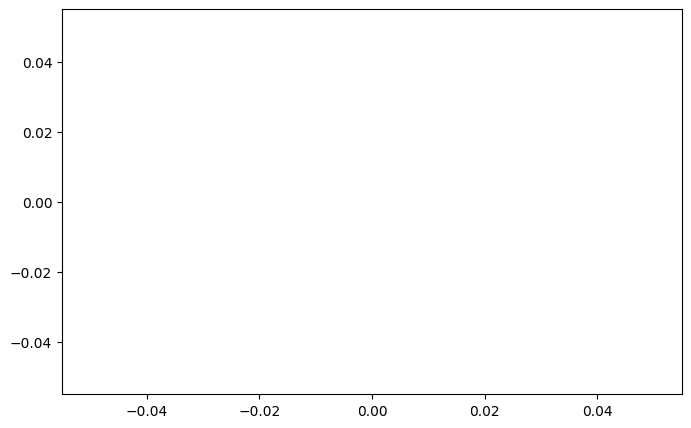

In [41]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='classification', y='ClosedPnL',  palette='coolwarm')
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.savefig('profit_by_sentiment.png')

ValueError: List of boxplot statistics and `positions` values must have same the length

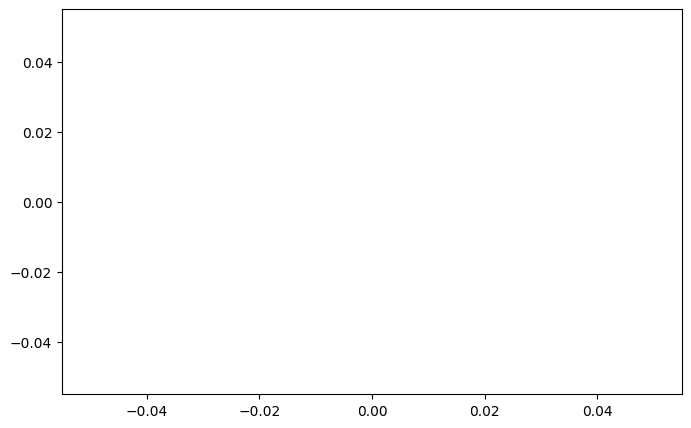

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(data=merged, x='classification', y='ClosedPnL')  # ✅ removed palette
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.savefig('profit_by_sentiment.png')


In [43]:
merged['ClosedPnL'].dtype


dtype('float64')

In [44]:
cleaned = merged.dropna(subset=['ClosedPnL', 'classification'])

In [45]:
print(cleaned['classification'].value_counts())

Series([], Name: count, dtype: int64)


In [46]:
print("Total rows in merged dataset:", len(merged))
print("Rows with non-null ClosedPnL:", merged['ClosedPnL'].notnull().sum())
print("Rows with non-null classification:", merged['classification'].notnull().sum())
print("Rows where both are non-null:", merged.dropna(subset=['ClosedPnL', 'classification']).shape[0])


Total rows in merged dataset: 211224
Rows with non-null ClosedPnL: 211224
Rows with non-null classification: 0
Rows where both are non-null: 0


In [48]:
print("Sample from trades:")
print(traders['date_only'].dropna().unique()[:5])

print("\nSample from sentiment:")
print(sentiment['date_only'].dropna().unique()[:5])


Sample from trades:
[datetime.date(1970, 1, 1)]

Sample from sentiment:
[datetime.date(2018, 2, 1) datetime.date(2018, 2, 2)
 datetime.date(2018, 2, 3) datetime.date(2018, 2, 4)
 datetime.date(2018, 2, 5)]


In [50]:
print(traders['Timestamp'].dtype)
print(traders['Timestamp'].head(5))
print(traders['Timestamp'].min(), traders['Timestamp'].max())


datetime64[ns]
0   1970-01-01 00:28:50
1   1970-01-01 00:28:50
2   1970-01-01 00:28:50
3   1970-01-01 00:28:50
4   1970-01-01 00:28:50
Name: Timestamp, dtype: datetime64[ns]
1970-01-01 00:28:00 1970-01-01 00:29:10


In [51]:
print(traders.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only'],
      dtype='object')


In [52]:
traders['Timestamp IST'] = pd.to_datetime(traders['Timestamp IST'], errors='coerce')


In [53]:
traders['date_only'] = traders['Timestamp IST'].dt.date


In [54]:
print(traders['date_only'].dropna().unique()[:5])


[datetime.date(2024, 2, 12) datetime.date(2024, 3, 12)
 datetime.date(2024, 4, 12) datetime.date(2025, 4, 3)
 datetime.date(2025, 5, 3)]


In [55]:
# Re-convert sentiment date column if not already done
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce')
sentiment['date_only'] = sentiment['date'].dt.date

# Now merge both datasets on date_only
merged = pd.merge(traders, sentiment[['date_only', 'classification']], on='date_only', how='left')


In [56]:
print(merged['classification'].value_counts())

classification
Fear             13869
Greed            11292
Extreme Greed     5621
Neutral           2756
Extreme Fear      2326
Name: count, dtype: int64


In [58]:
# Drop rows with missing data before plotting
cleaned = merged.dropna(subset=['Closed PnL', 'classification'])

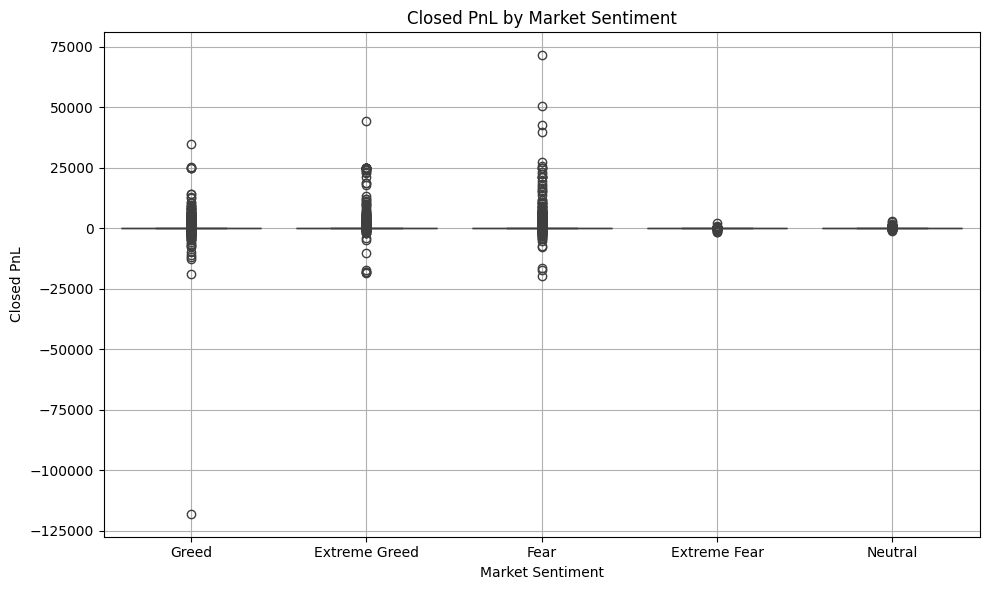

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned, x='classification', y='Closed PnL')
plt.title('Closed PnL by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Closed PnL')
plt.grid(True)
plt.tight_layout()
plt.savefig('profit_by_sentiment.png')


In [73]:
from google.colab import files
files.download('profit_by_sentiment.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [61]:
print(cleaned.columns)

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp', 'date_only', 'classification'],
      dtype='object')


In [62]:
cleaned = cleaned.rename(columns={'Start Position': 'Leverage'})

In [67]:
cleaned[['Leverage']].describe()

,Leverage
count,3.586400e+04
mean,2.701678e+04
std,4.308246e+05
min,-1.050000e+07
25%,-2.638983e+02
50%,7.010137e+01
75%,1.090053e+04
max,3.050948e+07


In [68]:
print(cleaned['Leverage'].unique()[:10])


[   0.         986.5245955 1002.518996  1146.558564  1289.488521
 1298.215466  1299.624972  1443.664541  1477.652641  1523.636541 ]


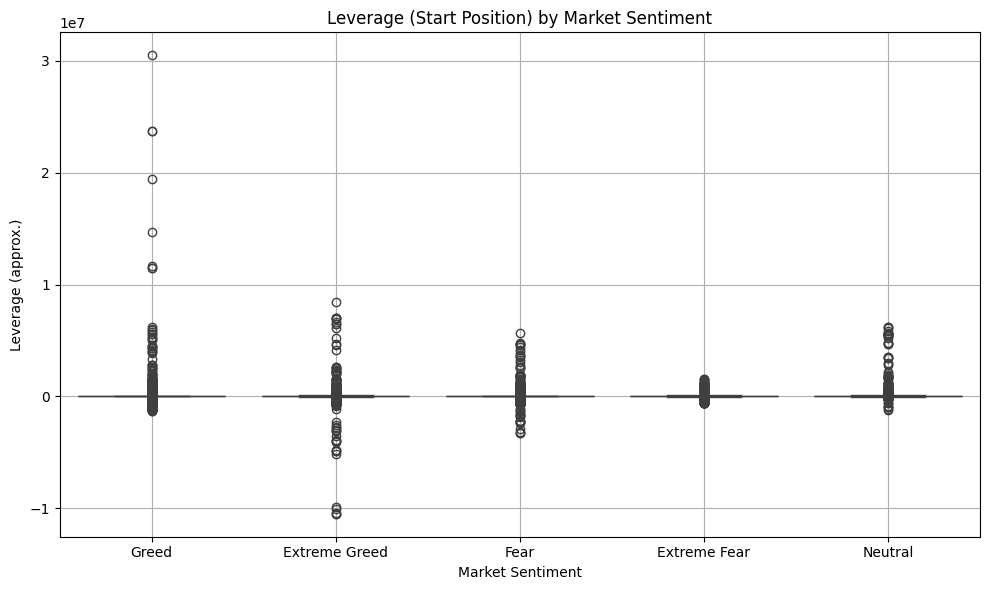

In [63]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=cleaned, x='classification', y='Leverage')
plt.title('Leverage (Start Position) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Leverage (approx.)')
plt.grid(True)
plt.tight_layout()
plt.savefig('leverage_by_sentiment.png')

In [72]:
from google.colab import files
files.download('leverage_by_sentiment.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [69]:
volume_stats = cleaned.groupby('classification')['Size USD'].agg(['sum', 'mean', 'count'])
print("Trade Volume Stats:\n", volume_stats)


Trade Volume Stats:
                         sum         mean  count
classification                                 
Extreme Fear     9580240.04  4118.761840   2326
Extreme Greed   18223760.27  3242.085086   5621
Fear            79674391.06  5744.782685  13869
Greed           57045815.74  5051.878829  11292
Neutral         11939551.21  4332.202906   2756


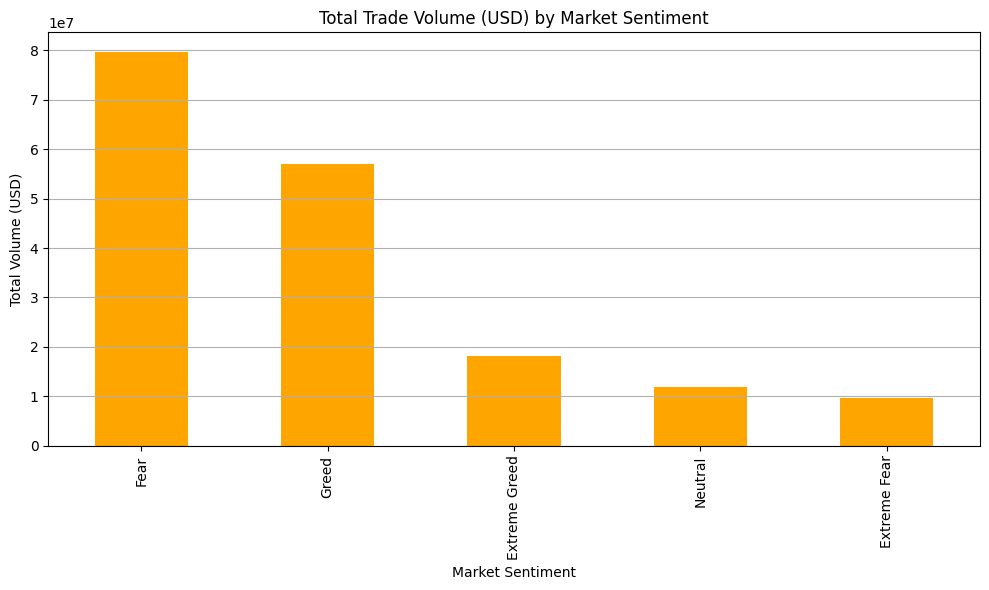

In [70]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
cleaned.groupby('classification')['Size USD'].sum().sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Total Trade Volume (USD) by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Total Volume (USD)')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('volume_by_sentiment.png')

In [71]:
from google.colab import files
files.download('volume_by_sentiment.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [74]:
side_counts = cleaned.groupby(['classification', 'Side']).size().unstack()
print("Buy/Sell Counts:\n", side_counts)

Buy/Sell Counts:
 Side             BUY  SELL
classification            
Extreme Fear    1168  1158
Extreme Greed   1661  3960
Fear            7307  6562
Greed           5407  5885
Neutral         1020  1736


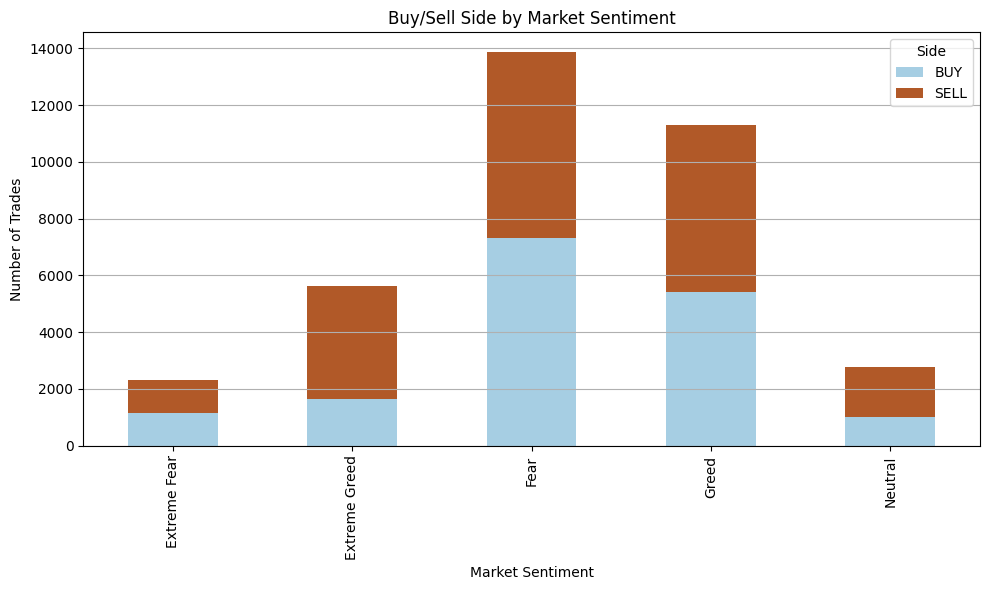

In [75]:
import matplotlib.pyplot as plt

side_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='Paired')
plt.title('Buy/Sell Side by Market Sentiment')
plt.xlabel('Market Sentiment')
plt.ylabel('Number of Trades')
plt.grid(axis='y')
plt.tight_layout()
plt.savefig('side_distribution_by_sentiment.png')


In [76]:
from google.colab import files
files.download('side_distribution_by_sentiment.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>